In [10]:
import uproot
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [11]:
fontsize = 28

In [12]:
def getHist(file, key):
    f = uproot.open(file)
    hist = f[key]
    return hist.to_numpy()

In [13]:
def normalizeVals(values):
    integral = np.sum(values)
    if integral != 0:
        normalized_values = values / integral  # Normalize to unit area
        print(f"Normalized Integral: {np.sum(normalized_values)}")
        return normalized_values
    else:
        print("Histogram has zero integral and cannot be normalized.")
    

In [14]:
def plotHist(edges, values, name, hatch):
    # Compute bin centers for consistent alignment
    bin_centers = (edges[:-1] + edges[1:]) / 2  

    # Plot filled bars with transparency (alpha)
    bars = plt.bar(bin_centers, values, width=np.diff(edges), align='center', 
                   edgecolor='black', alpha=0.3, label=name, hatch=hatch)

    # Get the color from the bars (first bar color)
    bar_color = bars.patches[0].get_facecolor()

    # Plot the step line using the same color (without alpha)
    plt.step(bin_centers, values, where='mid', color=bar_color, linewidth=4.0)
    return bars

In [15]:
def weighted_stats(values, weights):
    weighted_mean = np.sum(weights * values) / np.sum(weights)
    weighted_variance = np.sum(weights * (values - weighted_mean) ** 2) / np.sum(weights)
    weighted_std = np.sqrt(weighted_variance)
    return weighted_mean, weighted_std

In [24]:
def doIt(histKey, inputs, output, fontsize=fontsize, **kwargs):
    # Set global font sizes for all plot elements
    plt.rcParams.update({
        'font.size': fontsize,             # Base font size
        'axes.titlesize': fontsize,        # Title size
        'axes.labelsize': fontsize,        # X/Y label size
        'xtick.labelsize': fontsize,       # X tick label size
        'ytick.labelsize': fontsize,       # Y tick label size
        'legend.fontsize': fontsize,       # Legend text size
        'legend.title_fontsize': fontsize  # Legend title size
    })

    hatches = ['/', '\\', '|', '-']  # Hatch styles for each bar

    plt.figure(figsize=(16, 9))
    files = inputs[0]
    names = inputs[1]
    handles = []  # For custom legend entries

    for i, file in enumerate(files):
        values, edges = getHist(file, histKey)
        bin_centers = (edges[:-1] + edges[1:]) / 2
        mean, std = weighted_stats(bin_centers, values)
        xlim = kwargs.get('xlim', None)
        if xlim:        
            # if a xlim is specified we want to compute stats only for this limit
            mask = np.bitwise_and(bin_centers < xlim[1], bin_centers > xlim[0])
            mean, std = weighted_stats(bin_centers[mask], values[mask])
        normalized_values = normalizeVals(values)
        
        # Plot histogram and get color
        
        bars = plotHist(edges, normalized_values, names[i], None)
        bar_color = bars.patches[0].get_facecolor()[:3]  # RGB tuple (ignore alpha)
        
        # Convert RGB to RGBA with alpha of 0.5
        rgba_color = matplotlib.colors.to_rgba(bar_color, alpha=0.3)

        if kwargs.get('stats', True):
            # Create a custom legend label with stats
            label_with_stats = f'{names[i]}: {mean:.2f} ± {std:.2f}'
        else:
            label_with_stats = f'{names[i]}'
        
        # Create a custom legend handle with color and label
        patch = mpatches.Patch(color=rgba_color, label=label_with_stats)
        handles.append(patch)

    # Create legend with custom handles and labels
    plt.legend(handles=handles, loc='upper right')

    # Plot settings
    plt.title(kwargs.get('title', 'Comparison normalized ToT'))
    plt.xlim(kwargs.get('xlim', None))
    plt.xlabel(kwargs.get('xlabel', 'ToT (LSB)'))
    plt.ylabel(kwargs.get('ylabel', 'Normalized Counts'))
    plt.grid()
    plt.savefig(output)
    plt.show()


Normalized Integral: 1.0
Normalized Integral: 1.0
Normalized Integral: 0.9999999403953552
Normalized Integral: 1.0


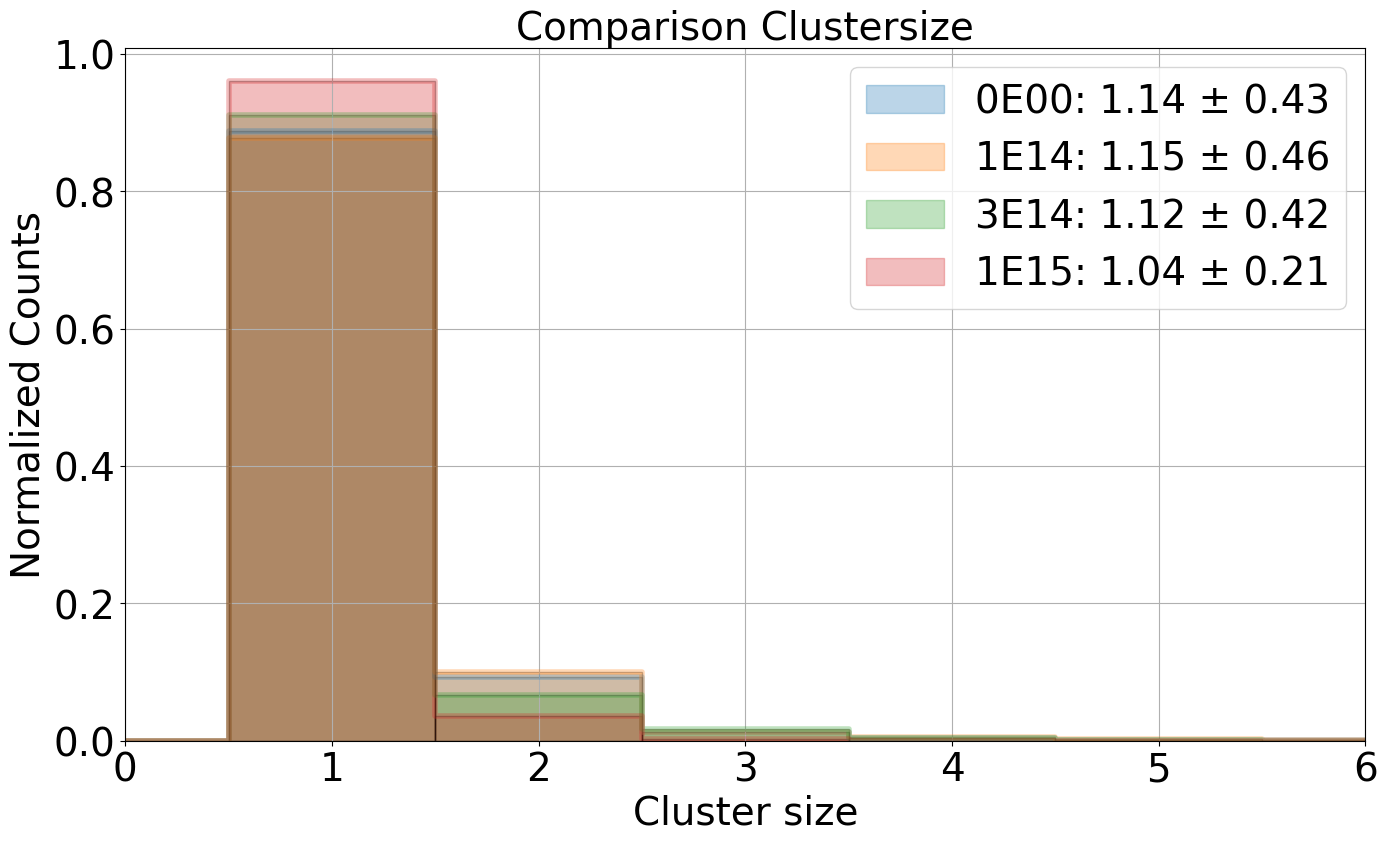

In [25]:
files = ['/home/bernhard/diss/mpw4/tb/desy_apr24/analysis/harmonized/V-W3/thr/run000217_thr200mV_bias190V.root','1E14Backside/std/run000058_hv-190_vnfbnan.root', '3E14Backside/std/run000293_hv-190_vnfbnan.root', '1E15/std/run000176_hv-190_vnfbnan.root']
# files = [
#     '1E15/std/run000176_hv-190_vnfbnan.root',  # Red in the back
#     '/home/bernhard/diss/mpw4/tb/desy_apr24/analysis/harmonized/V-W3/thr/run000217_thr200mV_bias190V.root',
#     '1E14Backside/std/run000058_hv-190_vnfbnan.root',
#     '3E14Backside/std/run000293_hv-190_vnfbnan.root'
# ]
names = ['0E00', '1E14', '3E14', '1E15']
# names = ['1E15', '3E14', '1E14', '0E00']
histKey = 'ClusteringSpatial/RD50_MPWx_0/clusterSize'

doIt(histKey, (files, names), 'comp_clustersize.png', title='Comparison Clustersize', xlabel='Cluster size', ylabel='Normalized Counts', xlim=(0,6))

Normalized Integral: 1.0
Normalized Integral: 1.0
Normalized Integral: 1.0
Normalized Integral: 1.0


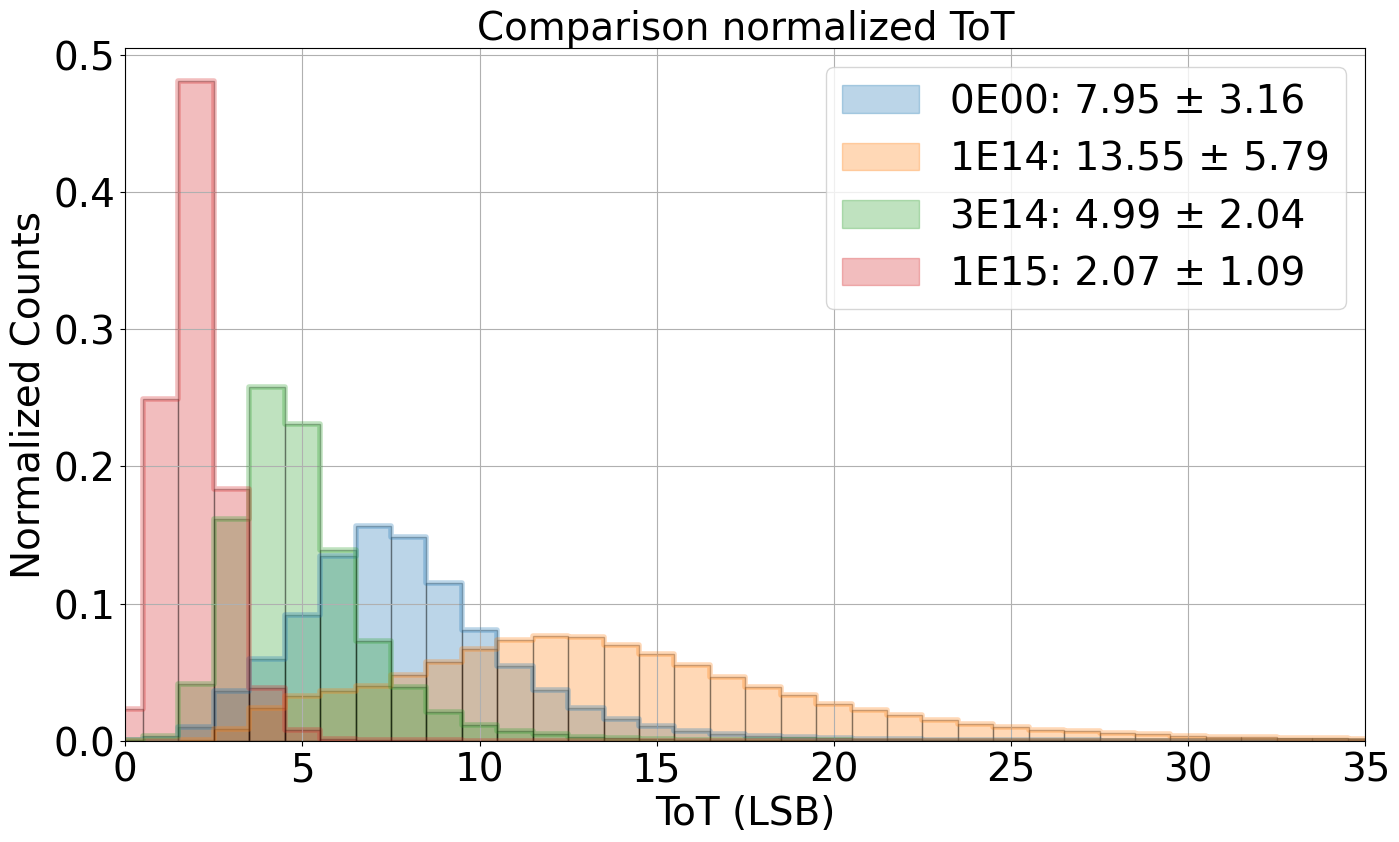

In [26]:
histKey = 'EventLoaderEUDAQ2/RD50_MPWx_0/hPixelRawValues'
doIt(histKey, (files, names), 'comp_tot.png', title='Comparison normalized ToT', xlabel='ToT (LSB)', ylabel='Normalized Counts', xlim=(0,35))

Normalized Integral: 1.0
Normalized Integral: 1.0
Normalized Integral: 1.0
Normalized Integral: 0.9999999403953552


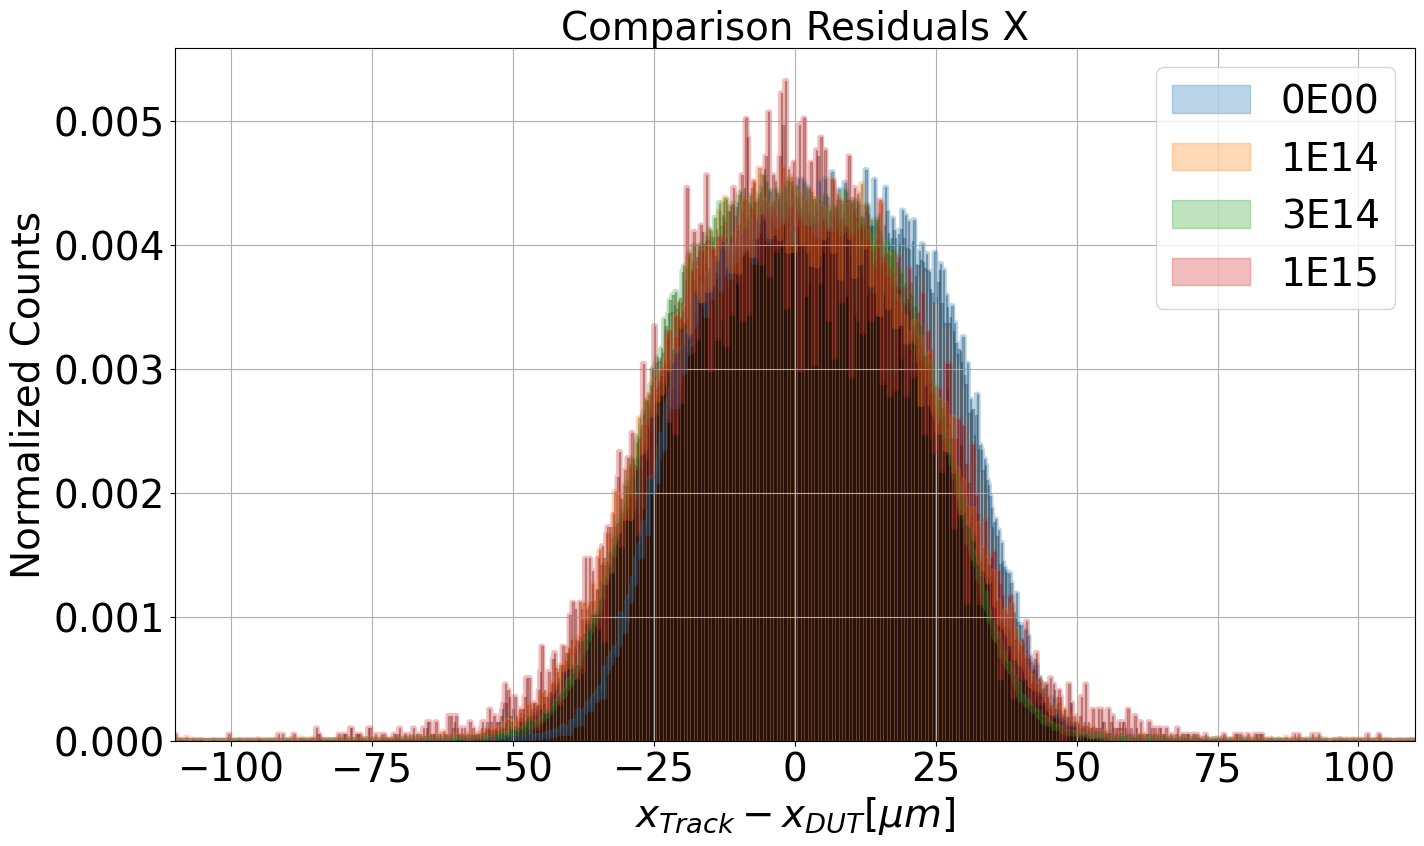

In [27]:
histKey = 'AnalysisDUT/RD50_MPWx_0/local_residuals/residualsX'
doIt(histKey, (files, names), 'comp_resX.png', title='Comparison Residuals X', xlabel='$x_{Track} - x_{DUT} [\\mu m]$', ylabel='Normalized Counts', xlim=(-110, 110), stats=False)

Normalized Integral: 1.0
Normalized Integral: 1.0
Normalized Integral: 1.0000001192092896


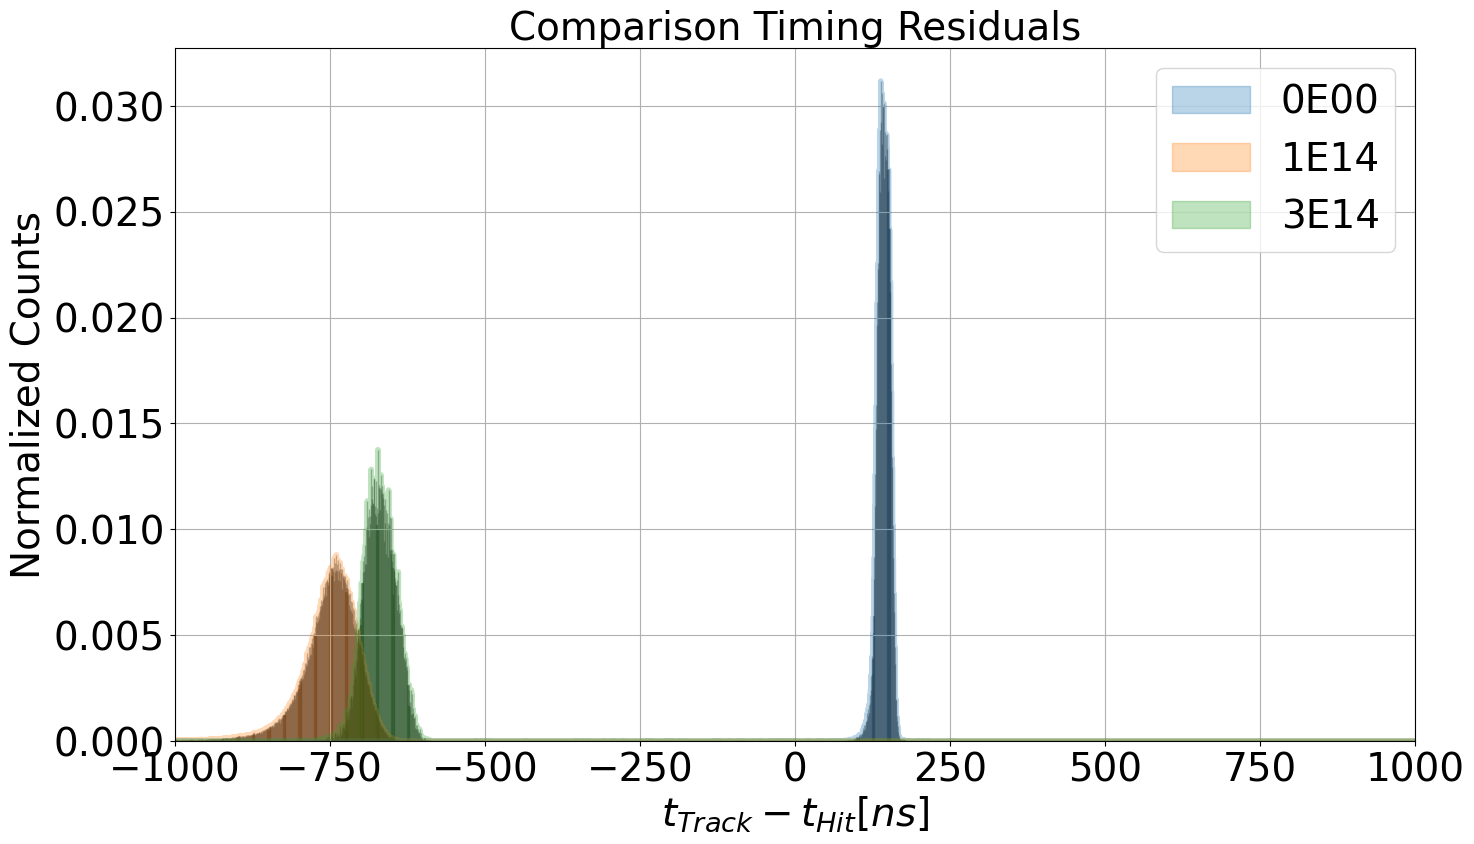

In [29]:
histKey = 'AnalysisDUT/RD50_MPWx_0/residualsTime'
files = ['1E14Backside/std/run000058_hv-190_vnfbnan.root', '3E14Backside/std/run000293_hv-190_vnfbnan.root', '1E15/std/run000176_hv-190_vnfbnan.root']
doIt(histKey, (files, names), 'comp_resT.png', title='Comparison Timing Residuals', xlabel='$t_{Track} - t_{Hit} [ns]$', ylabel='Normalized Counts', xlim=(-1000, 1000), stats=False)

Normalized Integral: 1.0000001192092896
Normalized Integral: 1.0000001192092896


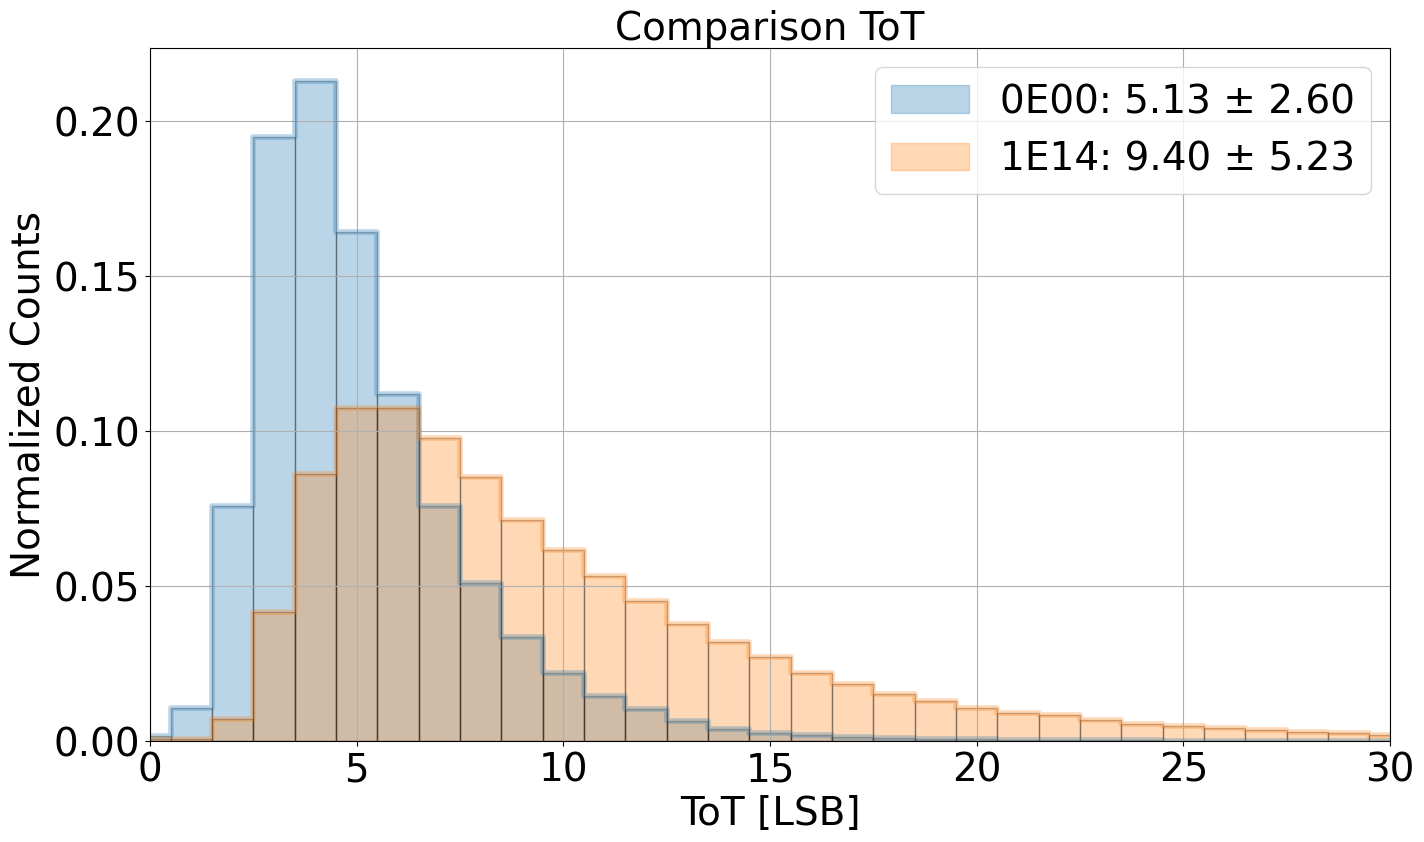

In [36]:
histKey = 'EventLoaderEUDAQ2/RD50_MPWx_0/hPixelRawValues'
files = ['/home/bernhard/cernbox/Diss/mpw4/lab/irradiated/large_tot/w3-0e0.root', '/home/bernhard/cernbox/Diss/mpw4/lab/irradiated/large_tot/w3-1e14.root']
doIt(histKey, (files, names), '/home/bernhard/cernbox/Diss/mpw4/lab/irradiated/large_tot/comp_tot.png', title='Comparison ToT', xlabel='ToT [LSB]', ylabel='Normalized Counts', xlim=(0,30))